<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in New York City</font></h1>

## Introduction

In this lab, you will learn how to convert addresses into their equivalent latitude and longitude values. Also, you will use the Foursquare API to explore neighborhoods in London City. You will use the **explore** function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. You will use the *k*-means clustering algorithm to complete this task. Finally, you will use the Folium library to visualize the neighborhoods in London City and their emerging clusters.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in London City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c anaconda geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 1. Download and Explore Dataset

The London's Districts, Wards data included theirs location I get from https://www.doogal.co.uk/london_postcodes.php. In this website they provide many more data features as well.

For convenience, I downloaded data to the csv file named London postcodes.csv

In [2]:
df = pd.read_csv("London postcodes.csv")
df.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Terminated,Parish,National Park,Population,Households,Built up area,Built up sub-division,Lower layer super output area,Rural/urban,Region,Altitude,London zone,LSOA Code,Local authority,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2016-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,71,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,0,2020-02-19,Bromley South,0.218257,BR,BR1,Metropolitan Police,Thames Water,9F32C228+J5,63100
1,BR1 1AB,Yes,51.406333,0.015208,540262,169405,TQ402694,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2012-03-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 008B,Urban major conurbation,London,71,4,E01000676,NaN,E02000134,Bromley 008,E43000196,E00003255,E14000604,13716,1,0,2020-02-19,Bromley North,0.253666,BR,BR1,Metropolitan Police,Thames Water,9F32C248+G3,56100
2,BR1 1AD,No,51.400057,0.016715,540386,168710,TQ403687,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2014-09-01,2017-09-01,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,53,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,1,2020-02-19,Bromley South,0.044559,BR,BR1,Metropolitan Police,NaN,9F32C228+2M,63100
3,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2008-08-01,NaN,"Bromley, unparished area",NaN,34.0,21.0,Greater London,Bromley,Bromley 018C,Urban major conurbation,London,71,4,E01000677,NaN,E02000144,Bromley 018,E43000196,E00003266,E14000604,20694,1,0,2020-02-19,Bromley North,0.462939,BR,BR1,Metropolitan Police,Thames Water,9F32C237+RM,63100
4,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2015-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,58,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,0,2020-02-19,Bromley South,0.227664,BR,BR1,Metropolitan Police,Thames Water,9F32C227+HX,63100


In [3]:
df.shape

(321834, 47)

Only get useful columns

In [4]:
import gc
df1 = df[["In Use?", "Latitude", "Longitude", "District", "Ward", "Distance to station", "Average Income"]]
df1 = df1[df1["In Use?"] == "Yes"].drop("In Use?", axis = 1)
del df
gc.collect()
df1.head()

,Latitude,Longitude,District,Ward,Distance to station,Average Income
0,51.401546,0.015415,Bromley,Bromley Town,0.218257,63100
1,51.406333,0.015208,Bromley,Bromley Town,0.253666,56100
3,51.404543,0.014195,Bromley,Bromley Town,0.462939,63100
4,51.401392,0.014948,Bromley,Bromley Town,0.227664,63100
5,51.401392,0.014948,Bromley,Bromley Town,0.227664,63100


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178631 entries, 0 to 321833
Data columns (total 6 columns):
Latitude               178631 non-null float64
Longitude              178631 non-null float64
District               178631 non-null object
Ward                   178631 non-null object
Distance to station    178631 non-null float64
Average Income         178631 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ MB


In [6]:
df2 = df1.groupby(["District", "Ward"]).mean()
df2.reset_index(inplace=True)
df2.head()

,District,Ward,Latitude,Longitude,Distance to station,Average Income
0,Barking and Dagenham,Abbey,51.539522,0.078656,0.392944,48918.981481
1,Barking and Dagenham,Alibon,51.545776,0.149430,0.619879,39966.433566
2,Barking and Dagenham,Becontree,51.554130,0.118653,1.278766,41791.803279
3,Barking and Dagenham,Chadwell Heath,51.581009,0.136161,1.565064,42354.696133
4,Barking and Dagenham,Eastbrook,51.555313,0.169640,1.091349,43528.220859


In [7]:
df2.shape

(657, 6)

In [8]:
df2.describe()

,Latitude,Longitude,Distance to station,Average Income
count,657.000000,657.000000,657.000000,657.000000
mean,51.504979,-0.122499,0.682637,54218.917188
std,0.073921,0.152656,0.441224,7822.785080
min,51.306034,-0.483520,0.105469,37581.509434
25%,51.455712,-0.216039,0.425930,48294.656489
50%,51.513429,-0.113344,0.576934,53554.495913
75%,51.557744,-0.026001,0.827273,59636.746988
max,51.673787,0.263077,4.787153,79864.000000


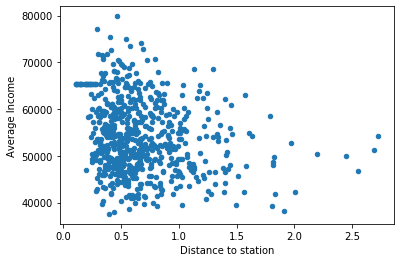

In [9]:
ax1 = df2[df2['Distance to station'] < 3].plot.scatter(x='Distance to station',
                      y='Average Income')

In [10]:
df2

,District,Ward,Latitude,Longitude,Distance to station,Average Income
0,Barking and Dagenham,Abbey,51.539522,0.078656,0.392944,48918.981481
1,Barking and Dagenham,Alibon,51.545776,0.149430,0.619879,39966.433566
2,Barking and Dagenham,Becontree,51.554130,0.118653,1.278766,41791.803279
3,Barking and Dagenham,Chadwell Heath,51.581009,0.136161,1.565064,42354.696133
4,Barking and Dagenham,Eastbrook,51.555313,0.169640,1.091349,43528.220859
5,Barking and Dagenham,Eastbury,51.536281,0.106155,0.570498,41535.294118
6,Barking and Dagenham,Gascoigne,51.532633,0.084073,0.841102,43553.170732
7,Barking and Dagenham,Goresbrook,51.536022,0.135131,0.596484,41584.285714
8,Barking and Dagenham,Heath,51.555458,0.149847,1.491326,39492.417062
9,Barking and Dagenham,Longbridge,51.543463,0.098502,0.684696,47126.666667


#### Use geopy library to get the latitude and longitude values of London City.

In [11]:
address = 'London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of London are 51.5073219, -0.1276474.


#### Create a map of London with neighborhoods superimposed on top.

In [12]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, avg_income in zip(df2['Latitude'], df2['Longitude'], df2['District'], df2['Ward'], df2['Average Income']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(avg_income - 30000)/5000,
        popup=label,
        color= 'blue',
        #fill=True,
        #fill_color= '#3186cc', 
        #fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Westminster. So let's slice the original dataframe and create a new dataframe of the Westminster data.

In [13]:
westminster_data = df2[df2['District'] == 'Westminster'].reset_index(drop=True)
westminster_data.head()

,District,Ward,Latitude,Longitude,Distance to station,Average Income
0,Westminster,Abbey Road,51.534389,-0.178130,0.348602,58690.769231
1,Westminster,Bayswater,51.516542,-0.192393,0.369832,56642.222222
2,Westminster,Bryanston and Dorset Square,51.518893,-0.161665,0.261539,62404.838710
3,Westminster,Church Street,51.523588,-0.169852,0.335066,39800.000000
4,Westminster,Churchill,51.488495,-0.147332,0.581559,50622.065728


Let's get the geographical coordinates of Westminster.

In [14]:
address = 'Westminster, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Westminster are {}, {}.'.format(latitude, longitude))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Westminster are 51.5013562, -0.1249302.


As we did with all of London City, let's visualizat Westminster the neighborhoods in it.

In [15]:
# create map of Manhattan using latitude and longitude values
map_westminster = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label, avg_income in zip(westminster_data['Latitude'], westminster_data['Longitude'], 
                                      westminster_data['Ward'], westminster_data['Average Income']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(avg_income - 30000)/5000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_westminster)  
    
map_westminster

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [16]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

CLIENT_ID = 'BDU3L12SS0PUDVK2QHMIJ1T1MGLJLAQ33HO4OFKXGC0TRNSH' # your Foursquare ID
CLIENT_SECRET = 'AGRGLAMKHXZDYNARONPLJ3RWESASTEF1F3EXIEBWHTZ2RCVZ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Folium installed
Libraries imported.
Your credentails:
CLIENT_ID: BDU3L12SS0PUDVK2QHMIJ1T1MGLJLAQ33HO4OFKXGC0TRNSH
CLIENT_SECRET:AGRGLAMKHXZDYNARONPLJ3RWESASTEF1F3EXIEBWHTZ2RCVZ


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [17]:
westminster_data.loc[0, 'Ward']

'Abbey Road'

Get the neighborhood's latitude and longitude values.

In [18]:
neighborhood_latitude = westminster_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = westminster_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = westminster_data.loc[0, 'Ward'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Abbey Road are 51.534389347692304, -0.178129836923077.


#### Now, let's get the top 100 venues that are in Abbey Road within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [60]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=BDU3L12SS0PUDVK2QHMIJ1T1MGLJLAQ33HO4OFKXGC0TRNSH&client_secret=AGRGLAMKHXZDYNARONPLJ3RWESASTEF1F3EXIEBWHTZ2RCVZ&v=20180604&ll=51.534389347692304,-0.178129836923077&radius=500&limit=100'

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


Send the GET request and examine the resutls

In [61]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9560671d67cb001b8eee36'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Abbey Road',
  'headerFullLocation': 'Abbey Road, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 51.53888935219231,
    'lng': -0.17090913112236694},
   'sw': {'lat': 51.5298893431923, 'lng': -0.18535054272378704}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518d0f964a520aaa620e3',
       'name': 'Abbey Road Studios',
       'location': {'address': '3 Abbey Rd',
        'crossStreet': 'Garden Rd',
        'lat': 51.53237121009653,
        'lng': -0.17777877833888267,
        'labeledLatLngs': [{'l

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [62]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [63]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Abbey Road Studios,Recording Studio,51.532371,-0.177779
1,Abbey Road Shop,Gift Shop,51.532311,-0.177740
2,Abbey Road Crossing,Historic Site,51.532063,-0.177268
3,Heartcore Fitness,Pilates Studio,51.535725,-0.174741
4,Heartcore Pilates,Gym / Fitness Center,51.535570,-0.175002


And how many venues were returned by Foursquare?

In [64]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Westminster

#### Let's create a function to repeat the same process to all the neighborhoods in Westminster

In [65]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *westminster_venues*.

In [66]:

westminster_venues = getNearbyVenues(names=westminster_data['Ward'],
                                   latitudes=westminster_data['Latitude'],
                                   longitudes=westminster_data['Longitude']
                                  )


westminster_venues.head (20)



Abbey Road
Bayswater
Bryanston and Dorset Square
Church Street
Churchill
Harrow Road
Hyde Park
Knightsbridge and Belgravia
Lancaster Gate
Little Venice
Maida Vale
Marylebone High Street
Queen's Park
Regent's Park
St James's
Tachbrook
Vincent Square
Warwick
West End
Westbourne


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Road,51.534389,-0.17813,Abbey Road Studios,51.532371,-0.177779,Recording Studio
1,Abbey Road,51.534389,-0.17813,Abbey Road Shop,51.532311,-0.177740,Gift Shop
2,Abbey Road,51.534389,-0.17813,Abbey Road Crossing,51.532063,-0.177268,Historic Site
3,Abbey Road,51.534389,-0.17813,Heartcore Fitness,51.535725,-0.174741,Pilates Studio
4,Abbey Road,51.534389,-0.17813,Heartcore Pilates,51.535570,-0.175002,Gym / Fitness Center
5,Abbey Road,51.534389,-0.17813,Panzer's,51.533646,-0.172300,Deli / Bodega
6,Abbey Road,51.534389,-0.17813,Yasmeen Restaurant,51.535251,-0.181345,Middle Eastern Restaurant
7,Abbey Road,51.534389,-0.17813,GAIL's Bakery,51.533885,-0.171737,Bakery
8,Abbey Road,51.534389,-0.17813,Gelato Mio,51.533824,-0.171114,Ice Cream Shop
9,Abbey Road,51.534389,-0.17813,Belgrave Restaurant,51.537085,-0.183836,Persian Restaurant


Double-click __here__ for the solution.
<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 

#### Let's check the size of the resulting dataframe

In [67]:
print(westminster_venues.shape)
westminster_venues.head()

(1231, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Road,51.534389,-0.17813,Abbey Road Studios,51.532371,-0.177779,Recording Studio
1,Abbey Road,51.534389,-0.17813,Abbey Road Shop,51.532311,-0.177740,Gift Shop
2,Abbey Road,51.534389,-0.17813,Abbey Road Crossing,51.532063,-0.177268,Historic Site
3,Abbey Road,51.534389,-0.17813,Heartcore Fitness,51.535725,-0.174741,Pilates Studio
4,Abbey Road,51.534389,-0.17813,Heartcore Pilates,51.535570,-0.175002,Gym / Fitness Center


Let's check how many venues were returned for each neighborhood

In [68]:
westminster_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbey Road,30,30,30,30,30,30
Bayswater,95,95,95,95,95,95
Bryanston and Dorset Square,99,99,99,99,99,99
Church Street,35,35,35,35,35,35
Churchill,27,27,27,27,27,27
Harrow Road,35,35,35,35,35,35
Hyde Park,98,98,98,98,98,98
Knightsbridge and Belgravia,83,83,83,83,83,83
Lancaster Gate,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [69]:
print('There are {} uniques categories.'.format(len(westminster_venues['Venue Category'].unique())))

There are 189 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [70]:
# one hot encoding
westminster_onehot = pd.get_dummies(westminster_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
westminster_onehot['Neighborhood'] = westminster_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [westminster_onehot.columns[-1]] + list(westminster_onehot.columns[:-1])
westminster_onehot = westminster_onehot[fixed_columns]

westminster_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Iraqi Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Park,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Road,Russian Restaurant,Salad Place,Sandwich Place,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Skate Park,Snack Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tour Provider,Tourist Information Center,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Abbey Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abbey Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abbey Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abbey Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [71]:
westminster_onehot.shape

(1231, 190)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [72]:
westminster_grouped = westminster_onehot.groupby('Neighborhood').mean().reset_index()
westminster_grouped

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Iraqi Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Park,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Road,Russian Restaurant,Salad Place,Sandwich Place,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Skate Park,Snack Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tour Provider,Tourist Information Center,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Abbey Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.00,0.00,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.0000,0.033333,0.000000,0.000000,0.066667,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.033333,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.

#### Let's confirm the new size

In [73]:
westminster_grouped.shape

(20, 190)

#### Let's print each neighborhood along with the top 5 most common venues

In [74]:
num_top_venues = 5

for hood in westminster_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = westminster_grouped[westminster_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbey Road----
           venue  freq
0           Café  0.10
1  Grocery Store  0.07
2  Deli / Bodega  0.07
3    Coffee Shop  0.07
4         Garden  0.03


----Bayswater----
         venue  freq
0        Hotel  0.11
1          Pub  0.09
2  Pizza Place  0.05
3         Café  0.05
4       Garden  0.04


----Bryanston and Dorset Square----
                       venue  freq
0  Middle Eastern Restaurant  0.09
1                Coffee Shop  0.07
2                       Café  0.04
3        Lebanese Restaurant  0.04
4                      Hotel  0.04


----Church Street----
            venue  freq
0     Coffee Shop  0.09
1         Theater  0.06
2   Grocery Store  0.06
3  Sandwich Place  0.06
4     Yoga Studio  0.03


----Churchill----
           venue  freq
0          Hotel  0.15
1  Deli / Bodega  0.07
2            Pub  0.07
3         Garden  0.07
4         Bakery  0.07


----Harrow Road----
               venue  freq
0      Grocery Store  0.11
1        Coffee Shop  0.09
2               Park

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = westminster_grouped['Neighborhood']

for ind in np.arange(westminster_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(westminster_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Road,Café,Coffee Shop,Deli / Bodega,Grocery Store,Sandwich Place,Recording Studio,Pub,Pizza Place,Pilates Studio,Persian Restaurant
1,Bayswater,Hotel,Pub,Café,Pizza Place,Persian Restaurant,Garden,Gym / Fitness Center,Indian Restaurant,Vegetarian / Vegan Restaurant,Spa
2,Bryanston and Dorset Square,Middle Eastern Restaurant,Coffee Shop,Café,Hotel,Lebanese Restaurant,Pizza Place,Gastropub,Pub,Bakery,Chinese Restaurant
3,Church Street,Coffee Shop,Theater,Grocery Store,Sandwich Place,Falafel Restaurant,Café,Canal,Plaza,Platform,Health & Beauty Service
4,Churchill,Hotel,Café,Deli / Bodega,Garden,Pub,Bakery,Bar,Farmers Market,Sandwich Place,Speakeasy
5,Harrow Road,Grocery Store,Coffee Shop,Park,Indian Restaurant,Pizza Place,Café,Middle Eastern Restaurant,Lebanese Restaurant,Pub,Ethiopian Restaurant
6,Hyde Park,Hotel,Italian Restaurant,Pub,Coffee Shop,Café,Middle Eastern Restaurant,Garden,Indian Restaurant,Outdoor Sculpture,Beer Bar
7,Knightsbridge and Belgravia,Café,Italian Restaurant,Hotel,Coffee Shop,Boutique,Japanese Restaurant,Middle Eastern Restaurant,Pizza Place,Department Store,Lebanese Restaurant
8,Lancaster Gate,Hotel,Café,Pub,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Pizza Place,Garden,Malay Restaurant,Greek Restaurant
9,Little Venice,Pub,Café,Lebanese Restaurant,Coffee Shop,Tapas Restaurant,French Restaurant,Movie Theater,Seafood Restaurant,Garden,Garden Center


<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [77]:
# set number of clusters
kclusters = 3

westminster_grouped_clustering = westminster_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(westminster_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
westminster_grouped_clustering

,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Court,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Iraqi Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Park,Pedestrian Plaza,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,Road,Russian Restaurant,Salad Place,Sandwich Place,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Skate Park,Snack Place,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tour Provider,Tourist Information Center,Toy / Game Store,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.00,0.00,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.0000,0.033333,0.000000,0.000000,0.066667,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.033333,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.00,0.000000,0.000000,0.0

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [79]:
westminster_data = df2[df2['District'] == 'Westminster'].reset_index(drop=True)

westminster_merged = westminster_data

# add clustering labels
westminster_merged['Cluster Labels'] = kmeans.labels_

# merge westminster_grouped with westminster_data to add latitude/longitude for each neighborhood
westminster_merged = westminster_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Ward')

westminster_merged.head() # check the last columns!

,District,Ward,Latitude,Longitude,Distance to station,Average Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster,Abbey Road,51.534389,-0.178130,0.348602,58690.769231,0,Café,Coffee Shop,Deli / Bodega,Grocery Store,Sandwich Place,Recording Studio,Pub,Pizza Place,Pilates Studio,Persian Restaurant
1,Westminster,Bayswater,51.516542,-0.192393,0.369832,56642.222222,0,Hotel,Pub,Café,Pizza Place,Persian Restaurant,Garden,Gym / Fitness Center,Indian Restaurant,Vegetarian / Vegan Restaurant,Spa
2,Westminster,Bryanston and Dorset Square,51.518893,-0.161665,0.261539,62404.838710,0,Middle Eastern Restaurant,Coffee Shop,Café,Hotel,Lebanese Restaurant,Pizza Place,Gastropub,Pub,Bakery,Chinese Restaurant
3,Westminster,Church Street,51.523588,-0.169852,0.335066,39800.000000,0,Coffee Shop,Theater,Grocery Store,Sandwich Place,Falafel Restaurant,Café,Canal,Plaza,Platform,Health & Beauty Service
4,Westminster,Churchill,51.488495,-0.147332,0.581559,50622.065728,0,Hotel,Café,Deli / Bodega,Garden,Pub,Bakery,Bar,Farmers Market,Sandwich Place,Speakeasy


Finally, let's visualize the resulting clusters

In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(westminster_merged['Latitude'], westminster_merged['Longitude'], westminster_merged['Ward'], westminster_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [81]:
westminster_merged.loc[westminster_merged['Cluster Labels'] == 0, westminster_merged.columns[[1] + list(range(5, westminster_merged.shape[1]))]]

,Ward,Average Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Road,58690.769231,0,Café,Coffee Shop,Deli / Bodega,Grocery Store,Sandwich Place,Recording Studio,Pub,Pizza Place,Pilates Studio,Persian Restaurant
1,Bayswater,56642.222222,0,Hotel,Pub,Café,Pizza Place,Persian Restaurant,Garden,Gym / Fitness Center,Indian Restaurant,Vegetarian / Vegan Restaurant,Spa
2,Bryanston and Dorset Square,62404.838710,0,Middle Eastern Restaurant,Coffee Shop,Café,Hotel,Lebanese Restaurant,Pizza Place,Gastropub,Pub,Bakery,Chinese Restaurant
3,Church Street,39800.000000,0,Coffee Shop,Theater,Grocery Store,Sandwich Place,Falafel Restaurant,Café,Canal,Plaza,Platform,Health & Beauty Service
4,Churchill,50622.065728,0,Hotel,Café,Deli / Bodega,Garden,Pub,Bakery,Bar,Farmers Market,Sandwich Place,Speakeasy
5,Harrow Road,49290.728477,0,Grocery Store,Coffee Shop,Park,Indian Restaurant,Pizza Place,Café,Middle Eastern Restaurant,Lebanese Restaurant,Pub,Ethiopian Restaurant
6,Hyde Park,58342.211055,0,Hotel,Italian Restaurant,Pub,Coffee Shop,Café,Middle Eastern Restaurant,Garden,Indian Restaurant,Outdoor Sculpture,Beer Bar
7,Knightsbridge and Belgravia,56300.000000,0,Café,Italian Restaurant,Hotel,Coffee Shop,Boutique,Japanese Restaurant,Middle Eastern Restaurant,Pizza Place,Department Store,Lebanese Restaurant
8,Lancaster Gate,60120.000000,0,Hotel,Café,Pub,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Pizza Place,Garden,Malay Restaurant,Greek Restaurant
9,Little Venice,58662.721893,0,Pub,Café,Lebanese Restaurant,Coffee Shop,Tapas Restaurant,French Restaurant,Movie Theater,Seafood Restaurant,Garden,Garden Center


#### Cluster 2

In [82]:
westminster_merged.loc[westminster_merged['Cluster Labels'] == 1, westminster_merged.columns[[1] + list(range(5, westminster_merged.shape[1]))]]

,Ward,Average Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Queen's Park,44789.756098,1,Yoga Studio,Gym,Garden,Italian Restaurant,French Restaurant,Food Court,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


#### Cluster 3

In [83]:
westminster_merged.loc[westminster_merged['Cluster Labels'] == 2, westminster_merged.columns[[1] + list(range(5, westminster_merged.shape[1]))]]

,Ward,Average Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Westbourne,45908.717949,2,Pub,Gym / Fitness Center,Indian Restaurant,Café,Middle Eastern Restaurant,Gastropub,Restaurant,Greek Restaurant,Bus Station,Convenience Store


#### Cluster 4

In [84]:
westminster_merged.loc[westminster_merged['Cluster Labels'] == 3, westminster_merged.columns[[1] + list(range(5, westminster_merged.shape[1]))]]

,Ward,Average Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Cluster 5

In [85]:
westminster_merged.loc[westminster_merged['Cluster Labels'] == 4, westminster_merged.columns[[1] + list(range(5, westminster_merged.shape[1]))]]

,Ward,Average Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
